# Updation of WebScraping Project

# Capstone Project - WebScraping -flipkart - Televisions

In [ ]:
import bs4
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import re
import csv

In [ ]:
page = 1

brand_name=[]
price=[]
tv_dis=[]
tv_rate=[]

reso=[]
sound=[]

while page <= 10:
    page = page + 1
    url=f"https://www.flipkart.com/televisions/pr?sid=ckf%2Cczl&p%5B%5D=facets.screen_size%255B%255D%3D48%2B-%2B55%2Binch&param=1&wid=10.productCard.PMU_V2_5&page={page}"
    response = requests.get(url)
    html = response.content    
    soup = bs(html,'html.parser')
    container = soup.find_all('div', class_='_2kHMtA')
    for ele in container:
        name=ele.find('div',class_='_4rR01T')
      
        brand_name.append(name.text)
      

        disprice=ele.find('div', class_='_30jeq3 _1_WHN1')
      
        price.append(disprice.text) if type(disprice) == bs4.element.Tag else price.append(np.nan) 
      

        discount=ele.find('div', class_='_3Ay6Sb')
        tv_dis.append(discount.text) if type(discount) == bs4.element.Tag else tv_dis.append(np.nan) 

        rating=ele.find('div', class_='_3LWZlK')
        tv_rate.append(rating.text) if type(rating) == bs4.element.Tag else tv_rate.append(np.nan) 
  
        specification = ele.find_all('li',class_="rgWa7D")
        for spec in specification:
       
            s= spec.text
            if "Pixels" in s:
                sreso= re.findall(r'\d+[\s]?[x][\s]?\d+[\s]?', s) 
                reso.append(sreso[0]) if sreso  else reso.append(np.nan)
            if "Speaker Output" in s:
                speaker = re.findall(r'\d+[\s]?',s)
                sound.append(speaker[0]) if speaker else sound.append(np.nan)

In [ ]:
print(len(brand_name))
print(len(price))
print(len(tv_dis))
print(len(tv_rate))
print(len(reso))
print(len(sound))

240
240
240
240
240
240


In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame({'Product Name':brand_name,"Price":price,"Total Discount":tv_dis,'Rating':tv_rate,'Screen Resolution':reso,'Speaker Output':sound})

In [ ]:
df.head()

,Product Name,Price,Total Discount,Rating,Screen Resolution,Speaker Output
0,Thomson OATHPRO Series 126 cm (50 inch) Ultra ...,"₹32,999",19% off,4.4,3840 x 2160,30
1,MOTOROLA ZX3 139 cm (55 inch) Ultra HD (4K) LE...,"₹39,999",34% off,NaN,NaN,44
2,SAMSUNG Crystal 4K 125 cm (50 inch) Ultra HD (...,"₹48,990",28% off,4.3,3840 x 2160,20
3,TCL C715 Series 126 cm (50 inch) QLED Ultra HD...,"₹42,999",60% off,4.3,3840 x 2160,30
4,LG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,"₹48,999",24% off,4.4,3840 x 2160,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product Name       240 non-null    object
 1   Price              240 non-null    object
 2   Total Discount     202 non-null    object
 3   Rating             195 non-null    object
 4   Screen Resolution  219 non-null    object
 5   Speaker Output     239 non-null    object
dtypes: object(6)
memory usage: 11.4+ KB


In [ ]:
df.isnull().sum()

Product Name          0
Price                 0
Total Discount       38
Rating               45
Screen Resolution    21
Speaker Output        1
dtype: int64

### Data Cleaning

In [ ]:
df.head()

,Product Name,Price,Total Discount,Rating,Screen Resolution,Speaker Output
0,Thomson OATHPRO Series 126 cm (50 inch) Ultra ...,"₹32,999",19% off,4.4,3840 x 2160,30
1,MOTOROLA ZX3 139 cm (55 inch) Ultra HD (4K) LE...,"₹39,999",34% off,NaN,NaN,44
2,SAMSUNG Crystal 4K 125 cm (50 inch) Ultra HD (...,"₹48,990",28% off,4.3,3840 x 2160,20
3,TCL C715 Series 126 cm (50 inch) QLED Ultra HD...,"₹42,999",60% off,4.3,3840 x 2160,30
4,LG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,"₹48,999",24% off,4.4,3840 x 2160,20


In [ ]:
# removing ₹ sign from Price Column
df['Price']=df['Price'].replace({'₹':""},regex=True)
df['Price'] = df['Price'].replace({',' : ''}, regex=True)
df.head()

,Product Name,Price,Total Discount,Rating,Screen Resolution,Speaker Output
0,Thomson OATHPRO Series 126 cm (50 inch) Ultra ...,32999,19% off,4.4,3840 x 2160,30
1,MOTOROLA ZX3 139 cm (55 inch) Ultra HD (4K) LE...,39999,34% off,NaN,NaN,44
2,SAMSUNG Crystal 4K 125 cm (50 inch) Ultra HD (...,48990,28% off,4.3,3840 x 2160,20
3,TCL C715 Series 126 cm (50 inch) QLED Ultra HD...,42999,60% off,4.3,3840 x 2160,30
4,LG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,48999,24% off,4.4,3840 x 2160,20


In [ ]:
df['Screen Resolution'].fillna(df['Screen Resolution'].mode()[0], inplace=True)

In [ ]:
df['Screen Resolution'].unique()

array(['3840 x 2160 ', '3840x2160 ', '1920 x 1080 ', '840 x 2',
       '3840 x 2860 ', '1024 x 768 '], dtype=object)

In [ ]:
df['Screen Resolution'].value_counts()

3840 x 2160     198
1920 x 1080      23
3840x2160        12
1024 x 768        4
3840 x 2860       2
840 x 2           1
Name: Screen Resolution, dtype: int64

In [ ]:
df['Screen Resolution'] = df['Screen Resolution'].replace({'3840x2160 ' : '3840 x 2160 '}, regex=True)

In [ ]:
df.drop(df.loc[df['Screen Resolution']==('3840 x 2160')].index,inplace=True)

In [ ]:
df['Screen Resolution'].value_counts()

3840 x 2160     210
1920 x 1080      23
1024 x 768        4
3840 x 2860       2
840 x 2           1
Name: Screen Resolution, dtype: int64

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object .
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Screen Resolution'.
df['Screen Resolution']= label_encoder.fit_transform(df['Screen Resolution'])
 
df['Screen Resolution'].unique()

array([2, 1, 4, 3, 0])

In [ ]:
df.head()

,Product Name,Price,Total Discount,Rating,Screen Resolution,Speaker Output
0,Thomson OATHPRO Series 126 cm (50 inch) Ultra ...,32999,19% off,4.4,2,30
1,MOTOROLA ZX3 139 cm (55 inch) Ultra HD (4K) LE...,39999,34% off,NaN,2,44
2,SAMSUNG Crystal 4K 125 cm (50 inch) Ultra HD (...,48990,28% off,4.3,2,20
3,TCL C715 Series 126 cm (50 inch) QLED Ultra HD...,42999,60% off,4.3,2,30
4,LG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,48999,24% off,4.4,2,20


In [ ]:
# Removing % sign from Total Discount Column
df['Total Discount']=df['Total Discount'].str.split('%').str[0]
df.head()

,Product Name,Price,Total Discount,Rating,Screen Resolution,Speaker Output
0,Thomson OATHPRO Series 126 cm (50 inch) Ultra ...,32999,19,4.4,2,30
1,MOTOROLA ZX3 139 cm (55 inch) Ultra HD (4K) LE...,39999,34,NaN,2,44
2,SAMSUNG Crystal 4K 125 cm (50 inch) Ultra HD (...,48990,28,4.3,2,20
3,TCL C715 Series 126 cm (50 inch) QLED Ultra HD...,42999,60,4.3,2,30
4,LG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,48999,24,4.4,2,20


In [ ]:
df['Price']=df['Price'].astype(float)
df['Rating']=df['Rating'].astype(float)
df['Speaker Output']=df['Speaker Output'].astype(float)

In [ ]:
df.dtypes

Product Name          object
Price                float64
Total Discount        object
Rating               float64
Screen Resolution      int32
Speaker Output       float64
dtype: object

# Checking and Filling Null values in each column

In [ ]:
df.isnull().sum()

Product Name          0
Price                 0
Total Discount       38
Rating               45
Screen Resolution     0
Speaker Output        1
dtype: int64

In [ ]:
# fill the null values of Total Discount column by using Median method
m=df['Total Discount'].median()
m

30.5

In [ ]:
df['Total Discount']=df['Total Discount'].fillna(m)

In [ ]:
# fill the null values of Screen Resolution column by using Mode method
m=df['Speaker Output'].mode()
m[0]

20.0

In [ ]:
df['Speaker Output']=df['Speaker Output'].fillna(m[0])

In [ ]:
m=df['Rating'].mode()
m

0    4.4
dtype: float64

In [ ]:
df['Rating']=df['Rating'].fillna(m[0])
m

0    4.4
dtype: float64

In [ ]:
df.head()

,Product Name,Price,Total Discount,Rating,Screen Resolution,Speaker Output
0,Thomson OATHPRO Series 126 cm (50 inch) Ultra ...,32999.0,19,4.4,2,30.0
1,MOTOROLA ZX3 139 cm (55 inch) Ultra HD (4K) LE...,39999.0,34,4.4,2,44.0
2,SAMSUNG Crystal 4K 125 cm (50 inch) Ultra HD (...,48990.0,28,4.3,2,20.0
3,TCL C715 Series 126 cm (50 inch) QLED Ultra HD...,42999.0,60,4.3,2,30.0
4,LG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,48999.0,24,4.4,2,20.0


In [ ]:
df.dtypes

Product Name          object
Price                float64
Total Discount        object
Rating               float64
Screen Resolution      int32
Speaker Output       float64
dtype: object

In [ ]:
df['Total Discount']=df['Total Discount'].astype(float)

In [ ]:
df.dtypes

Product Name          object
Price                float64
Total Discount       float64
Rating               float64
Screen Resolution      int32
Speaker Output       float64
dtype: object

In [ ]:
print(df.shape)

(240, 6)


In [ ]:
df.isnull().sum()

Product Name         0
Price                0
Total Discount       0
Rating               0
Screen Resolution    0
Speaker Output       0
dtype: int64

# Save cleaned and processed data to a CSV file

In [ ]:
df.to_csv('CapstoneWebScrapingTVFlipkart.csv', index=False)

In [ ]:
df1=pd.read_csv('CapstoneWebScrapingTVFlipkart.csv')

In [ ]:
df1.head()

,Product Name,Price,Total Discount,Rating,Screen Resolution,Speaker Output
0,Thomson OATHPRO Series 126 cm (50 inch) Ultra ...,32999.0,19.0,4.4,2,30.0
1,MOTOROLA ZX3 139 cm (55 inch) Ultra HD (4K) LE...,39999.0,34.0,4.4,2,44.0
2,SAMSUNG Crystal 4K 125 cm (50 inch) Ultra HD (...,48990.0,28.0,4.3,2,20.0
3,TCL C715 Series 126 cm (50 inch) QLED Ultra HD...,42999.0,60.0,4.3,2,30.0
4,LG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,48999.0,24.0,4.4,2,20.0


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Heatmap (Correlation)

<AxesSubplot:>

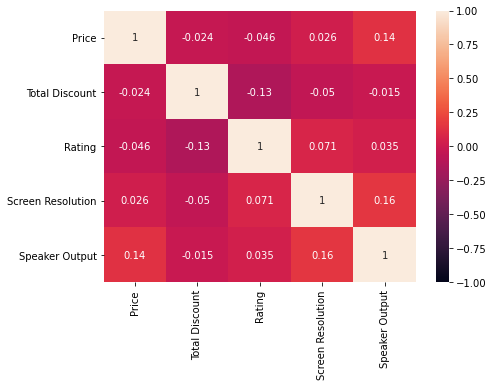

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(),annot=True,vmin=-1)

- After looking in to Heatmap Screen Resolution and Spekaer Output  has more effect on Price of Televisions

# Histogram

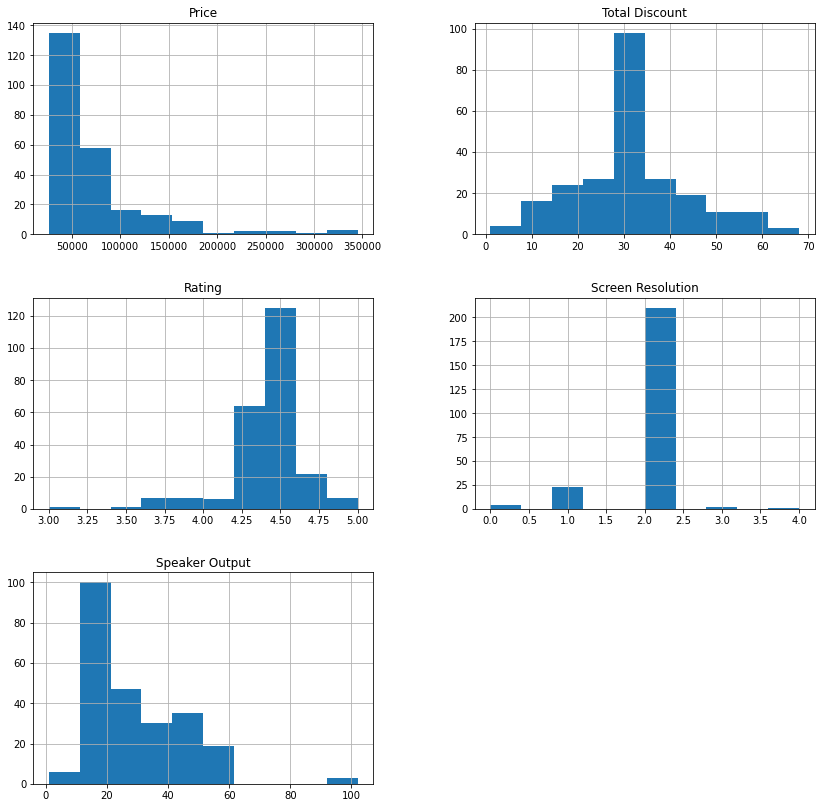

In [ ]:
df1.hist(figsize=(14,14))
plt.show()

### Price Range

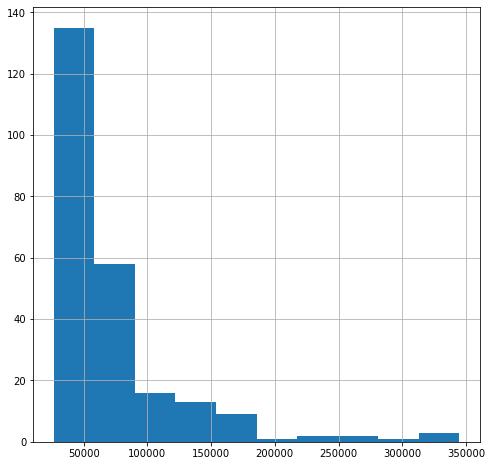

In [ ]:
df['Price'].hist(figsize=(8,8))
plt.show()

# Visualization

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


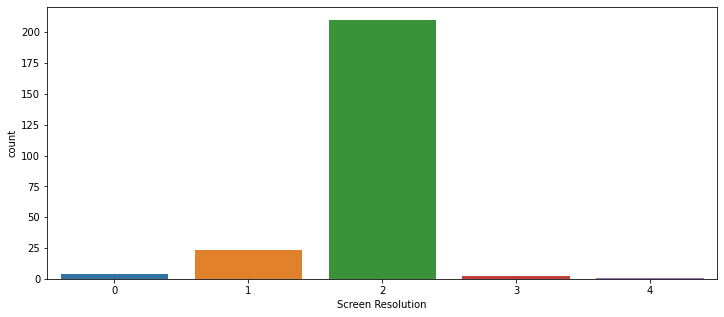

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(df['Screen Resolution']);

### Assigned Values for Screen Resolution
- 3840 x 2160 == 2
- 1920 x 1080 == 1
- 1024 x 768  == 4
- 3840 x 2860 == 3
- 840 x 2     == 0

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


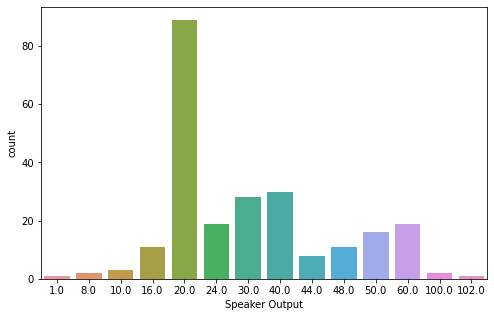

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['Speaker Output']);

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speaker Output', ylabel='Price'>

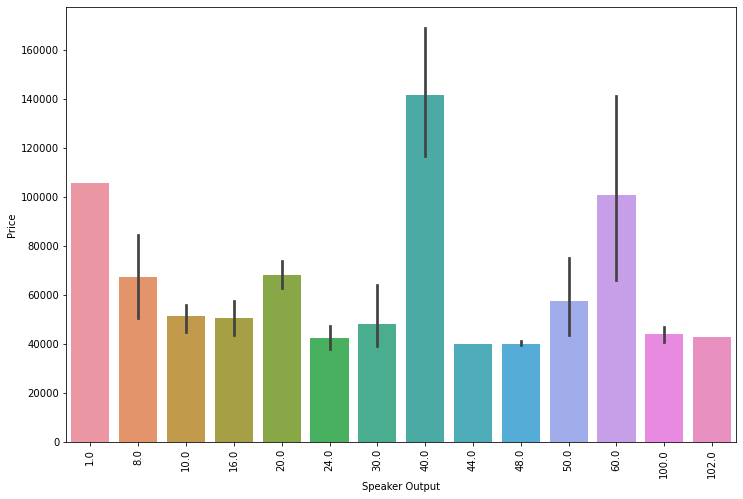

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(df['Speaker Output'],df.Price)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Screen Resolution', ylabel='Price'>

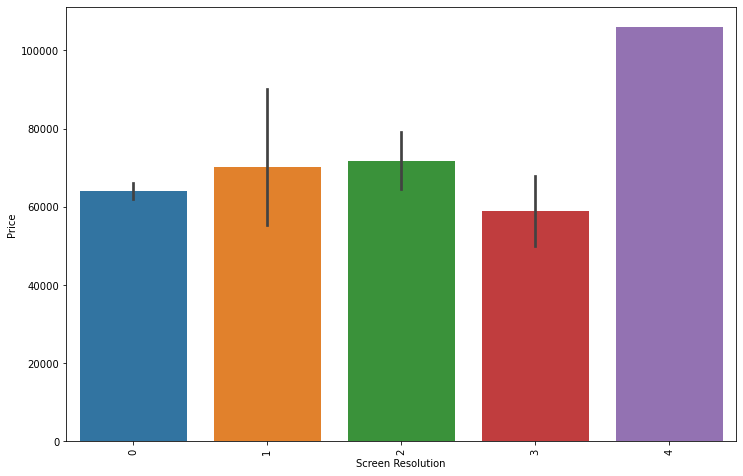

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(df['Screen Resolution'],df.Price)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speaker Output', ylabel='Price'>

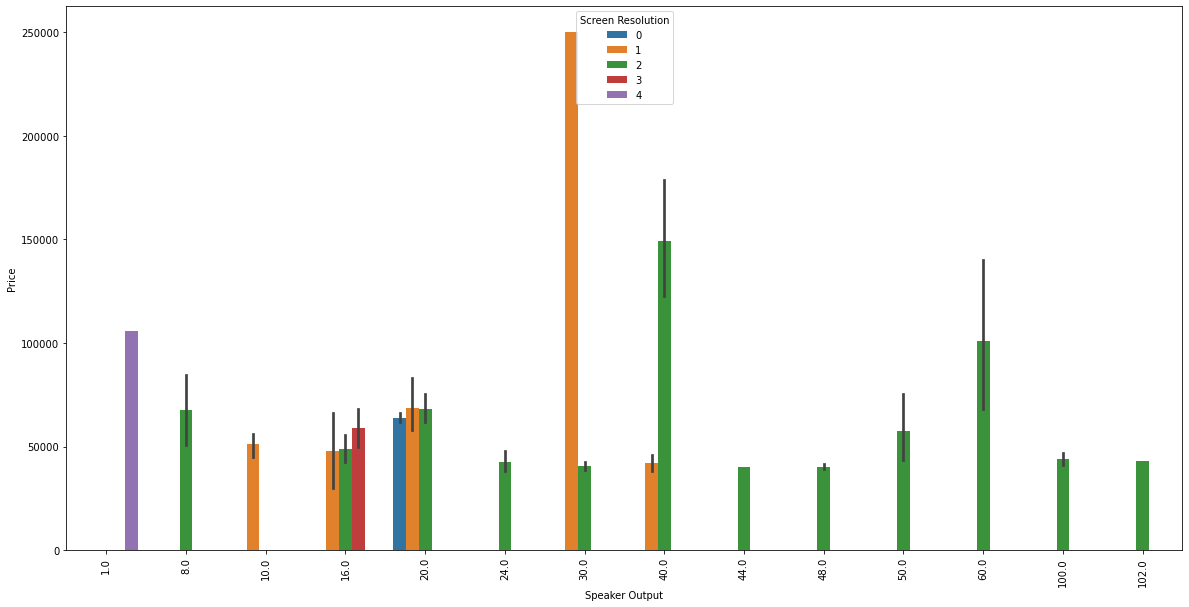

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(df['Speaker Output'],df.Price,hue=df['Screen Resolution'] )

In [ ]:
df1['Speaker Output'].value_counts()

20.0     89
40.0     30
30.0     28
24.0     19
60.0     19
50.0     16
16.0     11
48.0     11
44.0      8
10.0      3
8.0       2
100.0     2
1.0       1
102.0     1
Name: Speaker Output, dtype: int64

In [ ]:
watt = [100.0,102.0]
speaker_watt = df1[df1['Speaker Output'].isin(watt)]
print(speaker_watt)

                                         Product Name    Price  \
7   Vu Cinema TV Action Series 138 cm (55 inch) Ul...  46999.0   
12  Vu 126 cm (50 inch) Ultra HD (4K) LED Smart An...  40999.0   
33  Hisense A73F Series 126 cm (50 inch) Ultra HD ...  42990.0   

    Total Discount  Rating  Screen Resolution  Speaker Output  
7             44.0     4.4                  2           100.0  
12            36.0     4.4                  2           100.0  
33            28.0     4.5                  2           102.0  


In [ ]:
df1.head(8)

,Product Name,Price,Total Discount,Rating,Screen Resolution,Speaker Output
0,Thomson OATHPRO Series 126 cm (50 inch) Ultra ...,32999.0,19.0,4.4,2,30.0
1,MOTOROLA ZX3 139 cm (55 inch) Ultra HD (4K) LE...,39999.0,34.0,4.4,2,44.0
2,SAMSUNG Crystal 4K 125 cm (50 inch) Ultra HD (...,48990.0,28.0,4.3,2,20.0
3,TCL C715 Series 126 cm (50 inch) QLED Ultra HD...,42999.0,60.0,4.3,2,30.0
4,LG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,48999.0,24.0,4.4,2,20.0
5,Nokia 139 cm (55 inch) Ultra HD (4K) LED Smart...,39999.0,33.0,4.3,2,48.0
6,MOTOROLA ZX Pro 127 cm (50 inch) Ultra HD (4K)...,38999.0,29.0,4.4,2,50.0
7,Vu Cinema TV Action Series 138 cm (55 inch) Ul...,46999.0,44.0,4.4,2,100.0


- End